# Assignment #3 - Neural Networks

### <font color="red"> DUE: Mar 28 (Thursday) 11:00 pm </font>  

<font color="blue">Ruhani Faiheem Rahman</font>

# I. Overview

This project will help us to understand the logic of neural network and apply it to our real life. Here we will learn Cross Validation, Nonlinear Regression and Nonlinear Logistic Regression

# II Data

## Description

### Introduction of data

This Black Friday [1] dataset is the record of a retail store purchase history on black friday. The data stores age, occupation, marital status, gender, product catagory, purchase amount etc. These data can be analyzed further to predict the purchase amount of a customer or customers status like age, marital status.

This data is taken from https://www.kaggle.com/mehdidag/black-friday Analytics Vidhya hosted a competetion.

### Reding the data

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
#import pdb; pdb.set_trace()
%matplotlib inline


In [4]:
df = pd.read_csv('BlackFriday.csv')
#df = df.sample(n=10000)

In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


(537577, 12)

In [6]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [7]:
np.any(df.isnull())

True

In [8]:
df.describe()

User_ID    Occupation  Marital_Status  Product_Category_1  \
count  5.375770e+05  537577.00000   537577.000000       537577.000000   
mean   1.002992e+06       8.08271        0.408797            5.295546   
std    1.714393e+03       6.52412        0.491612            3.750701   
min    1.000001e+06       0.00000        0.000000            1.000000   
25%    1.001495e+06       2.00000        0.000000            1.000000   
50%    1.003031e+06       7.00000        0.000000            5.000000   
75%    1.004417e+06      14.00000        1.000000            8.000000   
max    1.006040e+06      20.00000        1.000000           18.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       370591.000000       164278.000000  537577.000000  
mean             9.842144           12.669840    9333.859853  
std              5.087259            4.124341    4981.022133  
min              2.000000            3.000000     185.000000  
25%              5.000000            9.000000    5866.000000  
50%              9.000000           14.000000    8062.000000  
75%             15.000000           16.000000   12073.000000  
max             18.000000           18.000000   23961.000000

## Preliminary Observation

So, this dataset contains over 500K data entries and 12 features. Most of the values are not null. Only Product_Category_2 and Product_Category_3 has some null values. We also need to convert some String value to int value for the analysis purposes.

## Preprocessing of the data

In [9]:
product_catagorys = ['Product_Category_1','Product_Category_2','Product_Category_3']

def convertToInt(df, column_name):
    labels = df.loc[:,column_name].unique().tolist()
    maps = dict(zip(labels,range(len(labels))))
    df[column_name] = df[column_name].apply(lambda x: maps[x])
    return maps;

def fillNullToZero(df, column_name):
    df[column_name].fillna(value=0.0, inplace=True)


In [10]:
for column in df.columns.values:
    fillNullToZero(df,column)
print(df.info())
print(np.any(df.isnull()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB
None
False


No null values now.

In [11]:
# Product_ID, Age, Gender, Stay_In_Current_City_Years, City_Category
#these features need to convert in integer.

if df.dtypes['Age'] == 'object':
    age_maps = convertToInt(df,'Age')

if df.dtypes['Gender'] == 'object':
    gender_maps = convertToInt(df,'Gender')

if df.dtypes['Stay_In_Current_City_Years'] == 'object':
    stay_maps = convertToInt(df,'Stay_In_Current_City_Years')
    
if df.dtypes['City_Category'] == 'object':
    city_maps = convertToInt(df,'City_Category')

if df.dtypes['Product_ID'] == 'object':
    city_maps = convertToInt(df,'Product_ID')


In [12]:
print(df.info())
print(np.any(df.isnull()))
print(df.columns.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null int64
Gender                        537577 non-null int64
Age                           537577 non-null int64
Occupation                    537577 non-null int64
City_Category                 537577 non-null int64
Stay_In_Current_City_Years    537577 non-null int64
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(10)
memory usage: 49.2 MB
None
False
['User_ID' 'Product_ID' 'Gender' 'Age' 'Occupation' 'City_Category'
 'Stay_In_Current_City_Years' 'Marital_Status' 'Product_Category_1'
 'Product_Category_2' 'Product_Category_3' 'Purchase']


Now every data is either integer or float. And all null data is replaced by 0. Now our data set is ready for analysis.

## Plots for Understanding or Analysis

In [13]:
def pychart(df, column_name,maps):
    sizes = df[column_name].value_counts()
    labels = []
    for key, value in sizes.items():
        labels.append(list(maps.keys())[list(maps.values()).index(key)])
    explode = [0] * len(labels)  # only "explode" the 2nd slice (i.e. 'Hogs')
    #print(explode)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    ax1.set_title(column_name + " Plot")
    plt.show()
    
def data_scatter(T, k=101):
    plt.plot(T[:k], '.')
    plt.xticks(range(0, 101, 20)[:k], range(0, 11, 2)[:k])
def data_scatter(X, T, k=101):
    plt.plot(X[:k], T[:k], '.')
    plt.xticks(range(0, k, 20)[:k], range(0, (int) (k), 1)[:k])

In [14]:
print(df.loc[:,'Age'].shape[0])

537577


(array([0.09119314, 0.        , 0.        , 0.12961244, 0.        ,
        0.        , 1.33122015, 0.        , 0.        , 0.        ,
        0.27609068, 0.        , 0.        , 0.23325651, 0.        ,
        0.        , 0.66656498, 0.        , 0.        , 0.60539544]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6,
        3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <a list of 20 Patch objects>)

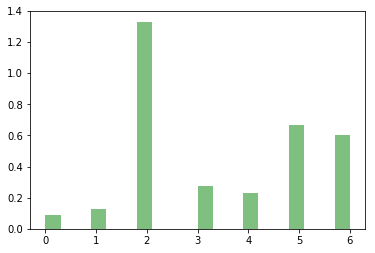

In [15]:
plt.hist(df.loc[:,'Age'], 20, density=True, facecolor='g', alpha=0.5)

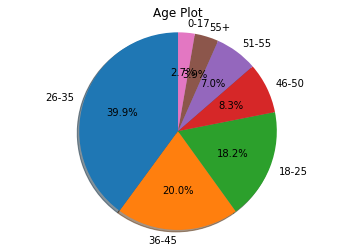

In [17]:
pychart(df,'Age',age_maps)

We can see that people buy products more offen in black friday whose age is between 18 to 45.

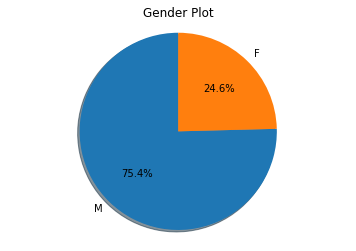

In [18]:
pychart(df,'Gender',gender_maps)

From this pychart we can see that males are more prone to attracted by the Black Friday than female. Almost 75% male buy products on black friday.

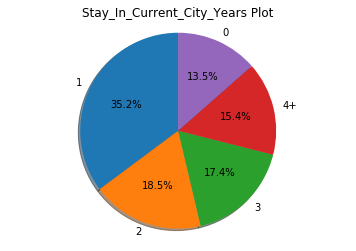

In [17]:
pychart(df,'Stay_In_Current_City_Years',stay_maps)

This is also a good observation that people who are in the city either less than 1 year or more than 2 year, don't buy stuff more often. The rate of buying products on black friday are more frequent who live in the city between 1 to 2 year. One of the reason could be they need to sttle down.

# III. Methods

## III.A 5-fold Cross Validation

- Explain and use 5-fold cross validation to find a good neural network parameters including the structure to report the CV accuracies. 


### Summary of Cross Validation

We can use cv to find the most effective data set to train a model. For that we choose a mixture of train and test data. And from the train data set, we have a validation set to test our trained model. We will choose the train data set which will give  us the lowest error.

### Explanation of CV code

First we get the partition of the data into 5 list. Then we iterate over those 5 sets and take one for test and others for training and validation. We select a set from the remaining as a validation step. For each validation step we take the remaining training data and train with different parameters to train the model.

We calculate the error for each case and find the lowest error to get the most desirable train and testing set.

### Implementation of CV

In [26]:
df = df.sample(n=1000)

In [69]:
def partition(df, kFold):
    
    partions = []

    n = df.__len__()
    data_per_set = (int) (n/kFold)
    base_dataset = df.copy();
    for i in range (1,6):
        
        print(i)
        train = base_dataset.sample(n = data_per_set)
        partions.append(train)
        base_dataset = df.drop(train.index)

    return partions

In [70]:
df.__len__()

1000

In [76]:
split_sets = partition(df,5)

1
2
3
4
5


In [72]:
split_sets.__len__()

5

In [75]:
for i in range (0,5):
    print(split_sets[i].describe())

            User_ID   Product_ID      Gender        Age  Occupation  \
count  2.000000e+02   200.000000  200.000000  200.00000  200.000000   
mean   1.003072e+06   962.610000    0.745000    3.37000    7.415000   
std    1.696927e+03   761.727564    0.436955    1.81648    5.871554   
min    1.000004e+06     5.000000    0.000000    0.00000    0.000000   
25%    1.001662e+06   350.500000    0.000000    2.00000    2.750000   
50%    1.003201e+06   784.500000    1.000000    3.00000    6.000000   
75%    1.004505e+06  1423.000000    1.000000    5.00000   12.000000   
max    1.006036e+06  3432.000000    1.000000    6.00000   20.000000   

       City_Category  Stay_In_Current_City_Years  Marital_Status  \
count     200.000000                  200.000000       200.00000   
mean        1.200000                    1.955000         0.45500   
std         0.802008                    1.334872         0.49922   
min         0.000000                    0.000000         0.00000   
25%         1.000000

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 106426 to 414168
Data columns (total 12 columns):
User_ID                       800 non-null int64
Product_ID                    800 non-null int64
Gender                        800 non-null int64
Age                           800 non-null int64
Occupation                    800 non-null int64
City_Category                 800 non-null int64
Stay_In_Current_City_Years    800 non-null int64
Marital_Status                800 non-null int64
Product_Category_1            800 non-null int64
Product_Category_2            800 non-null float64
Product_Category_3            800 non-null float64
Purchase                      800 non-null int64
dtypes: float64(2), int64(10)
memory usage: 81.2 KB


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 526748 to 204074
Data columns (total 12 columns):
User_ID                       200 non-null int64
Product_ID                    200 non-null int64
Gender                        200 non-null int64
Age                           200 non-null int64
Occupation                    200 non-null int64
City_Category                 200 non-null int64
Stay_In_Current_City_Years    200 non-null int64
Marital_Status                200 non-null int64
Product_Category_1            200 non-null int64
Product_Category_2            200 non-null float64
Product_Category_3            200 non-null float64
Purchase                      200 non-null int64
dtypes: float64(2), int64(10)
memory usage: 20.3 KB


In [530]:
def k_fold_cv(_model, dataframe, kfold):
    nfold = 0
    res = []
    testErrs = []
    global cv_test
    global cv_train
    split_fold = partition(dataframe, kfold)
    min_err = 9999999
    for i in range (0, 5):
        test_fold = split_fold[i]
        Xtest, Ttest = group_data(test_fold,"Product_Category_1", "Purchase")
        for j in range (0, 5):
            if i == j:
                continue
            validation_fold = split_fold[j]
            XValid, TValid = group_data(validation_fold,"Product_Category_1", "Purchase")
            firstTimeFlag = True
            for k in range (0, 5):
                if k == i:
                    continue
                if k == j:
                    continue
                if firstTimeFlag:
                    train_fold = split_fold[k]
                    print(firstTimeFlag)
                    firstTimeFlag = False
                else:
                    train_fold = train_fold.append(split_fold[k], ignore_index=True)

            Xtrain, Ttrain = group_data(train_fold,"Product_Category_1", "Purchase")
            _model.train(Xtrain, Ttrain)
            classes, y = _model.use(XValid, True)
            error = np.mean(np.abs(TValid - y[1])) * 100
            if error < min_err:
                cv_test = test_fold
                cv_train = train_fold
                cv_train = cv_train.append(validation_fold, ignore_index=True)
            res.append(error)
            testErrs.append(error)
        print(res)
        print(testErrs)

    return testErrs
#            print('test ' + str(i) + ', validation ' + str(j) + ', train rest.')    
#            print(train_fold.__len__())
#            print(validation_fold.__len__())
#            print(test_fold.__len__())
 
                  

## Result of CV

### Presentation of CV Result using Neural Net Model

Here is the graph of the CV result based on neuralnet class. We can see the different test error for different training and validation set

In [534]:
#X, T = group_data(train,"Age", "Purchase")
#Xtest, Ttest = group_data(test,"Age", "Purchase")
nn = NeuralNet([1,3,1])
err = k_fold_cv(nn, df, 5)

1
2
3
4
5
    Product_Category_1      Purchase
0                    1  14227.350877
1                    2  12645.750000
2                    3   9980.666667
3                    4   2964.500000
4                    5   6368.200000
5                    6  15540.100000
6                    7  14613.500000
7                    8   7362.866667
8                   11   5144.818182
9                   13    765.000000
10                  14  14903.500000
11                  16  15333.000000
    Product_Category_1      Purchase
0                    1  13178.981132
1                    2  10999.250000
2                    3   9992.500000
3                    4   2003.166667
4                    5   5998.509091
5                    6  16296.666667
6                    7  16747.000000
7                    8   7311.111111
8                   11   3756.222222
9                   12    750.000000
10                  13    748.000000
11                  15  11305.666667
12                  16  2041

16                  18   2310.000000
    Product_Category_1      Purchase
0                    1  13111.516129
1                    2  11775.000000
2                    3  10858.222222
3                    4   2660.200000
4                    5   6034.566038
5                    6  14825.000000
6                    7  16680.000000
7                    8   7333.714286
8                   10   9309.000000
9                   11   4797.833333
10                  13    838.500000
11                  15   4286.000000
12                  16  19218.333333
13                  18   3059.000000
True
    Product_Category_1      Purchase
0                    1  13762.448485
1                    2  12000.000000
2                    3   9852.043478
3                    4   2671.300000
4                    5   6275.415493
5                    6  16476.083333
6                    7  13864.666667
7                    8   7241.618705
8                    9   5303.000000
9                   10  16440.000

12                  16  20411.000000
True
    Product_Category_1      Purchase
0                    1  13763.348315
1                    2  11811.375000
2                    3  10531.625000
3                    4   2861.800000
4                    5   6276.344595
5                    6  15487.760000
6                    7  15646.750000
7                    8   7295.838235
8                    9   5303.000000
9                   10  10842.333333
10                  11   5007.107143
11                  12   1172.333333
12                  13    655.666667
13                  14  14850.333333
14                  15   4296.500000
15                  16  16647.375000
16                  18   2310.000000
    Product_Category_1      Purchase
0                    1  14000.050847
1                    2   9647.000000
2                    3  10572.333333
3                    4   3459.000000
4                    5   6459.044444
5                    6  16170.428571
6                    8   7201.816

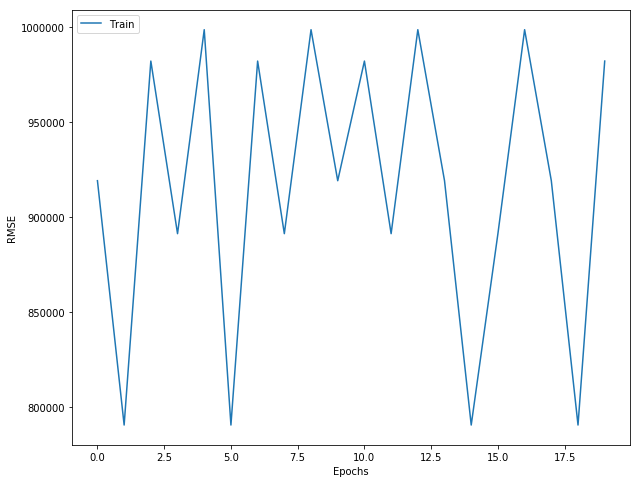

In [535]:
plt.figure(figsize=(10,8))
plt.plot(err)
#plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

In [525]:
err.__len__()

20

In [524]:
cv_train

User_ID  Product_ID  Gender  Age  Occupation  City_Category  \
0    1005773        1651       1    2           6              1   
1    1005571         469       0    2           9              1   
2    1003547         651       1    5          16              0   
3    1003737        1948       1    2          14              1   
4    1001880         286       1    5           0              2   
5    1001331         577       1    3           0              1   
6    1001873        2846       1    5           7              2   
7    1005387        1982       0    2           1              2   
8    1005283         614       1    6           2              1   
9    1000223        1505       1    2          17              2   
10   1004458         754       0    2           4              2   
11   1002456        1739       1    2           5              0   
12   1002907         801       0    5           5              0   
13   1004480         416       1    2           0              2   
14   1000023         286       1    5           0              2   
15   1005990        1256       0    2          20              2   
16   1000735        1745       1    2          14              0   
17   1005561        1235       0    2           3              1   
18   1003380        1208       1    4           0              2   
19   1001367         463       1    2          12              1   
20   1000637        1573       1    5          12              2   
21   1001284        1522       1    3          16              0   
22   1002599         159       1    2          12              2   
23   1001694          62       1    2          12              2   
24   1001010        2721       1    2           0              0   
25   1002374          83       1    2          14              2   
26   1001425        1401       1    0          10              2   
27   1000075          72       0    0          10              1   
28   1004732         925       1    2          14              2   
29   1005430        2123       0    3           1              2   
..       ...         ...     ...  ...         ...            ...   
770  1005831        1055       1    2           1              0   
771  1001358        1674       1    5          17              1   
772  1002546         592       0    1          13              1   
773  1002807         644       0    5          11              2   
774  1002772          36       1    5          17              0   
775  1004966         591       1    4          14              2   
776  1004053        1739       1    2          18              2   
777  1003985        2553       1    3          16              1   
778  1006005        1197       0    2           5              1   
779  1004725        1072       1    5           5              0   
780  1004043         837       0    2          15              2   
781  1005107        1123       0    3           0              2   
782  1002928        2634       1    2           2              2   
783  1002416         718       1    3           7              1   
784  1002820        1889       0    5           0              0   
785  1005143         149       1    6           4              1   
786  1001455        1073       0    3           0              2   
787  1003675         860       1    5           7              2   
788  1001594         663       0    5          20              2   
789  1004026         739       1    2           7              1   
790  1001865         547       0    6           1              2   
791  1001151         697       1    2          15              1   
792  1005279          63       0    2          14              2   
793  1005875         308       1    2           4              1   
794  1005964        2068       1    6           5              2   
795  1002237         390       0    5           6              2   
796  1001088         470       0    0          10            

In [107]:
k_fold_cv(df,5)

1
2
3
4
5
True
test 0, validation 1, train rest.
600
200
200
True
test 0, validation 2, train rest.
600
200
200
True
test 0, validation 3, train rest.
600
200
200
True
test 0, validation 4, train rest.
600
200
200
True
test 1, validation 0, train rest.
600
200
200
True
test 1, validation 2, train rest.
600
200
200
True
test 1, validation 3, train rest.
600
200
200
True
test 1, validation 4, train rest.
600
200
200
True
test 2, validation 0, train rest.
600
200
200
True
test 2, validation 1, train rest.
600
200
200
True
test 2, validation 3, train rest.
600
200
200
True
test 2, validation 4, train rest.
600
200
200
True
test 3, validation 0, train rest.
600
200
200
True
test 3, validation 1, train rest.
600
200
200
True
test 3, validation 2, train rest.
600
200
200
True
test 3, validation 4, train rest.
600
200
200
True
test 4, validation 0, train rest.
600
200
200
True
test 4, validation 1, train rest.
600
200
200
True
test 4, validation 2, train rest.
600
200
200
True
test 4, validati

## III.B Nonlinear Regression 

- Summarize the nonlinear regression model. 
- Use the NeuralNet class for regression to apply to your data. 
- Explain your codes (not in comment). 


### Summary of Nonlinear Regression

In short nonlinear regression is a function which is the non linear combination of the model parameters and depends on different types of variable. We use a activation function for each forward step. 

###  Explanation of codes

Here we are using nn.py to implement the nonlinear regression class.

We use forward and backward learning method. We also use a _objectf to get the error function for our case

In [168]:
df1 = df.loc[:, df.columns != 'Purchase']
df1.shape

(1000, 11)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 139176 to 160909
Data columns (total 12 columns):
User_ID                       1000 non-null int64
Product_ID                    1000 non-null int64
Gender                        1000 non-null int64
Age                           1000 non-null int64
Occupation                    1000 non-null int64
City_Category                 1000 non-null int64
Stay_In_Current_City_Years    1000 non-null int64
Marital_Status                1000 non-null int64
Product_Category_1            1000 non-null int64
Product_Category_2            1000 non-null float64
Product_Category_3            1000 non-null float64
Purchase                      1000 non-null int64
dtypes: float64(2), int64(10)
memory usage: 141.6 KB


In [192]:
train = df.sample(frac = 0.8)
test = df.drop(train.index)

X = train.loc[:,'Age'].values.reshape((-1, 1))
#X = train.loc[:,df.columns != 'Purchase']#.values.reshape((-1, 1))
T = train.loc[:,'Purchase'].values.reshape((-1, 1))

Xtest = test.loc[:,'Age'].values.reshape((-1,1))
#Xtest = test.loc[:,df.columns != 'Purchase']#.values.reshape((-1,1))
Ttest = test.loc[:,'Purchase'].values.reshape((-1,1))

nSamples = X.shape[0]
nOutputs = T.shape[1]

In [444]:
def group_data(df, columnName1, columnName2):
    age_group = df.groupby([columnName1], as_index=True)
    rdf = age_group[columnName2].mean()

    group_data = rdf.to_dict()
    dX = np.array
    gData = {columnName1: [], columnName2: []}
    replacement = {}

    count = 1
    for key in sorted(group_data.keys()):
        gData[columnName1].append(key)
        replacement[key] = count
        count += 1
        gData[columnName2].append(group_data[key])

    data = pd.DataFrame.from_dict(gData)
    
    print(data)
    dX = np.array(data[columnName1].replace(replacement)).reshape((data.__len__(), 1))
    dT = np.array(data[columnName2]).reshape((data.__len__(), 1))
    return dX, dT

In [445]:
X, T = group_data(train,"Age", "Purchase")
Xtest, Ttest = group_data(test,"Age", "Purchase")

   Age      Purchase
0    0   6590.096774
1    1  10332.708333
2    2   9433.862416
3    3   9398.966102
4    4   9091.338235
5    5   9107.572289
6    6   9154.344156
   Age     Purchase
0    0  8087.363636
1    1  8785.714286
2    2  8868.253333
3    3  9742.882353
4    4  6969.818182
5    5  8967.441860
6    6  8563.333333


In [450]:
T = np.(T)
T

9015.555472232012

In [191]:
print(replacement)
dX = np.array(data.Age.replace(replacement)).reshape((-1, 1))
dT = np.array(data.Purchase).reshape((-1, 1))

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7}


In [162]:
X.shape

(800, 1)

In [207]:
from nn import NeuralNet

In [222]:
nn = NeuralNet([1,3,1])
nn.train(dX, dT, ftracep=True) 
Ytest, Z = nn.use(Xtest, retZ=True)

In [426]:
def show_plot_with_hidden_unit(nn, X, T, Xtest, Ttest, Ytest, Z):
    plt.figure(figsize=(10,8))
    plt.subplot(3,1,1)
    plt.plot(nn.ftrace)
    plt.ylim(0,0.7)
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend(('Train','Test'),loc='upper left')

    plt.subplot(3,1,2)
    plt.plot(X,T,'o-',Xtest,Ttest,'o-',Xtest,Ytest,'o-')
    plt.xlim(-20,20)
    plt.legend(('Training','Testing','Model'),loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('Actual and Predicted $f(x)$')
    if Z:
        plt.subplot(3,1,3)
        plt.plot(X, Z[1])
        plt.ylim(-1.1,1.1)
        plt.xlabel('$x$')
        plt.ylabel('Hidden Unit Outputs ($z$)');
    

In [427]:
def show_plot(nn, X, T, Xtest, Ttest, Ytest):
    plt.figure(figsize=(10,8))
    plt.subplot(3,1,1)
    plt.plot(nn.ftrace)
    plt.ylim(0,0.7)
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend(('Train','Test'),loc='upper left')

    plt.subplot(3,1,2)
    plt.plot(X,T,'o-',Xtest,Ttest,'o-',Xtest,Ytest,'o-')
    plt.xlim(-20,20)
    plt.legend(('Training','Testing','Model'),loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('Actual and Predicted $f(x)$')
    

### Use Neural Net on toy data

In [428]:
# repeating the previous example

# Make some training data
n = 20
X = np.linspace(0.,20.0,n).reshape((n,1)) - 10
T = 0.2 + 0.05 * (X+10) + 0.4 * np.sin(X+10) + 0.2 * np.random.normal(size=(n,1))

# Make some testing data
Xtest = X + 0.1*np.random.normal(size=(n,1))
Ttest = 0.2 + 0.05 * (Xtest+10) + 0.4 * np.sin(Xtest+10) + 0.2 * np.random.normal(size=(n,1))

nSamples = X.shape[0]
nOutputs = T.shape[1]

In [429]:
nn = NeuralNet([1,3,1])
nn.train(X, T, ftracep=True) 
Ytest, Z = nn.use(Xtest, retZ=True)

In [430]:
Z[1].__len__()

20

### Plots for nonlinear neural net

We can see that toy data fits pretty much well with the neural net model.

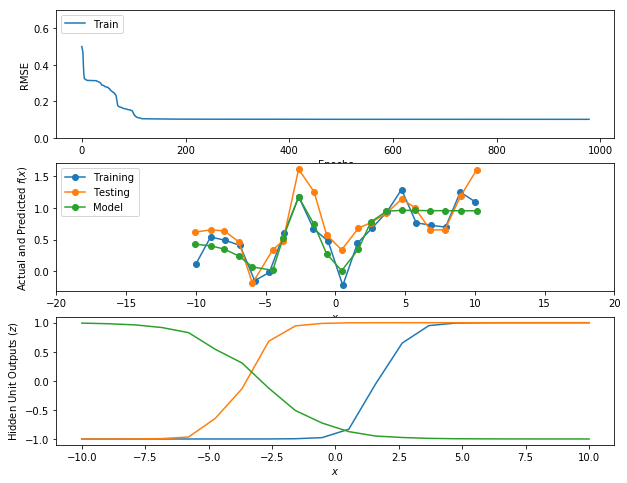

In [431]:
show_plot_with_hidden_unit(nn, X, T, Xtest, Ttest, Ytest, Z)

## Resuts of Nonlinear NN

### Use Neural Net on regression data from black friday data set

### Plot of nonlinear neural net with Black Friday Data

The figure belows is the output of our data using nonlinear nn

    Product_Category_1      Purchase
0                    1  13247.904306
1                    2  11080.766667
2                    3  10312.920000
3                    4   2583.181818
4                    5   6193.905660
5                    6  16055.451613
6                    7  13560.000000
7                    8   7157.895349
8                   10  16849.285714
9                   11   4592.333333
10                  12   1187.500000
11                  13    708.083333
12                  14  14884.333333
13                  15  13232.666667
14                  16  15905.538462
15                  18   3061.000000
    Product_Category_1      Purchase
0                    1  14081.655738
1                    2  11677.800000
2                    3   9230.625000
3                    4   2159.000000
4                    5   6037.953488
5                    6  16616.700000
6                    7  16500.000000
7                    8   7466.673077
8                    9   5303.000000
9

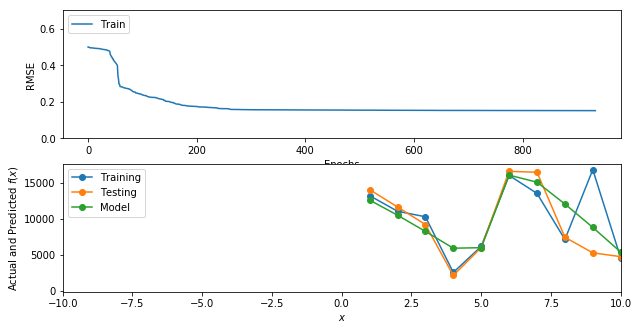

In [242]:
train = df.sample(frac = 0.8)
test = df.drop(train.index)
X, T = group_data(train,"Product_Category_1", "Purchase")
Xtest, Ttest = group_data(test,"Product_Category_1", "Purchase")
nn = NeuralNet([1,3,1])
nn.train(X, T, ftracep=True) 
Ytest, Z = nn.use(Xtest, retZ=True)
show_plot(nn, X, T, Xtest, Ttest, Ytest)

In [236]:
nn.ftrace

[0.5028901662157084,
 0.49817092074133873,
 0.49256500916434254,
 0.4629674948461434,
 0.4580382868616887,
 0.4532284277459532,
 0.4474733371767155,
 0.4474592121578107,
 0.4241247364788502,
 0.34713197713594324,
 0.2919406975451079,
 0.19751649381780276,
 0.12520646170140112,
 0.10209614439234416,
 0.0934530616826432,
 0.0787017832891839,
 0.07470818949408284,
 0.0669159132880106,
 0.06482560947196588,
 0.030129875744974093,
 0.029989517186069476,
 0.02903643656717195,
 0.028382699426498202,
 0.028020083198125528,
 0.024972063844412595,
 0.021953131099366474,
 0.021528338938330987,
 0.02135000008698506,
 0.02132727571849875,
 0.01954502049987412,
 0.019274191085680036,
 0.019218360291736885,
 0.019109122381949405,
 0.019089361646606472,
 0.0190521496019412,
 0.01883627038778887,
 0.018832266369791583,
 0.0188219280333129,
 0.018817520737961887,
 0.018812534887218398,
 0.018806876890072242,
 0.018805114832121824,
 0.01878304245175889,
 0.018699243856471367,
 0.018156674894540675,
 0.01

## III.C Nonlinear Logistic Regression

- Summarize the nonlinear logistic regression model. 
- Finish the following NeuralNetLogReg class.
- Check if your codes works well with toy synthetic data. 
- Apply to your classification data. 
- Explain your codes (not in comment). 

### Summary of Nonlinear Logistic Regression

In nonlinear logistic regression we are using softmax regression. That will give us the approximate class which will predict as the best.

### Explanation of code

We are using Nonlinear regression class as the base class to implement nonlinear logistic regression class. We implement the function as (e^x/(1+e^x)). Then we apply this to the output result of forward learning.

### Implementation of Nonlinear Logistic Regression Class

In [537]:
import numpy as np
from nn import NeuralNet
from sklearn.preprocessing import MultiLabelBinarizer


class NeuralNetLogReg(NeuralNet):

    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        super(NeuralNetLogReg, self).__init__(nunits)

    def softmax(self, x):
        """Compute softmax values for each sets of scores in x."""
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0)  # only difference

    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    """
    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)    
    """
    def forward(self, X):
        t, Z = super(NeuralNetLogReg, self).forward(X)
        g = self.softmax(t)
        return g, Z

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty
#       return -0.5 * np.sum(T * np.log(Y)) + wpenalty

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        mlb = MultiLabelBinarizer()
        imt = mlb.fit_transform(T)
#        imt = mlb.transform(T)

        print(imt)
        print(T)
        return super(NeuralNetLogReg, self).train(X, imt)
#        return super(NeuralNetLogReg, self).train(X, T)

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        y = super(NeuralNetLogReg, self).use(X)
        classes = np.argmax(y, axis=-1)
        return classes, y


### Testing Nonlinear Logistic Regression with Toy Data

Text(0.5, 1.0, 'test data set')

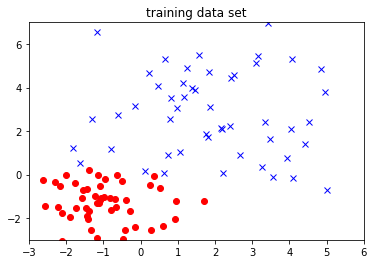

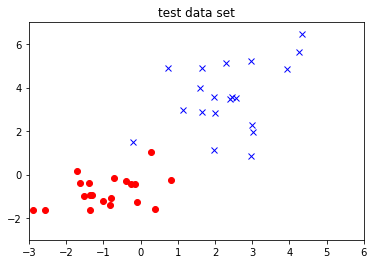

In [538]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")

In [539]:
# Apply Nonlinear Logistic Regression
clsf = NeuralNetLogReg([2, 4, 2])
clsf.train(Xtrain, Ttrain)
classes, Y = clsf.use(Xtest)

[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]

c:\users\rrahman3\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [468]:
Ttrain[6] = 0.02

In [492]:
Ttrain

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [463]:
classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [464]:
Y

array([[0.52631579, 0.5       ],
       [0.52631579, 0.5       ],
       [0.52631579, 0.5       ],
       [0.52631579, 0.5       ],
       [0.52631579, 0.5       ],
       [0.52631579, 0.5       ],
       [0.52631579, 0.5       ],
       [0.52631579, 0.5       ],
       [0.52631579, 0.5       ],
       [0.52631579, 0.5       ],
       [0.52631579, 0.5       ],
       [0.52631579, 0.5       ],
       [0.52631579, 0.5       ],
       [0.52631579, 0.5       ],
       [0.52631579, 0.5       ],
       [0.52631579, 0.5       ],
       [0.52631579, 0.5       ],
       [0.5       , 0.52380952],
       [0.52631579, 0.5       ],
       [0.52631579, 0.5       ],
       [0.5       , 0.52380952],
       [0.5       , 0.52380952],
       [0.5       , 0.52380952],
       [0.5       , 0.52380952],
       [0.5       , 0.52380952],
       [0.5       , 0.52380952],
       [0.5       , 0.52380952],
       [0.5       , 0.52380952],
       [0.5       , 0.52380952],
       [0.5       , 0.52380952],
       [0.

Accuracy:  49.98657407886816 %


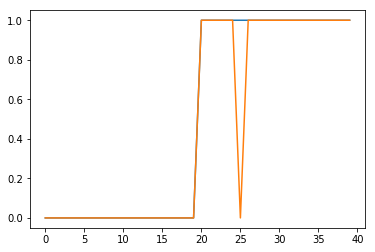

In [540]:
# retrieve labels and plot

plt.plot(Ttest)
plt.plot(classes)

print("Accuracy: ", 100 - np.mean(np.abs(Ttest - Y)) * 100, "%")

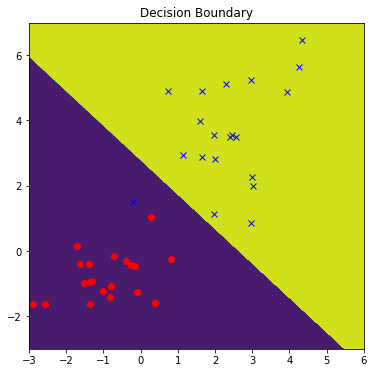

In [541]:
# show me the boundary

x = np.linspace(-3, 6, 1000)
y = np.linspace(-3, 7, 1000)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T
classes, _ = clsf.use(X)
zs = classes.reshape(xs.shape)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary")

plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

### Testing blackfriday data on neural net logistic regression

In [419]:
# standardization class
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 

In [422]:
def normalize(X):
    _mu = np.mean(X,0)
    _sigma = np.std(X,0)
    return (X - _mu) / _sigma 

In [550]:
train = df.sample(frac = 0.8)
test = df.drop(train.index)
X, T = group_data(train,"Age", "Purchase")
Xtest, Ttest = group_data(test,"Age", "Purchase")


   Age     Purchase
0    0  6986.486486
1    1  9880.375000
2    2  9288.980066
3    3  9397.112903
4    4  8553.241379
5    5  9010.237500
6    6  8969.297468
   Age      Purchase
0    0   6950.800000
1    1  10336.571429
2    2   9450.375000
3    3   9824.785714
4    4   9466.238095
5    5   9302.428571
6    6   9403.125000


In [549]:
T

array([[3.45098039],
       [3.56040268]])

In [440]:
T = T.Purchase

AttributeError: 'numpy.ndarray' object has no attribute 'Purchase'

In [494]:
T = normalize(T)
T = np.squeeze(np.asarray(T))

In [ ]:

show_plot(nn, X, T, Xtest, Ttest, Y)

In [551]:
# Apply Nonlinear Logistic Regression
clsf = NeuralNetLogReg([1, 3, 1])
clsf.train(X, T)
classes, Y = clsf.use(Xtest)

[[1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0]]
[[6986.48648649]
 [9880.375     ]
 [9288.98006645]
 [9397.11290323]
 [8553.24137931]
 [9010.2375    ]
 [8969.29746835]]


ValueError: shapes (7,7) and (1,3) not aligned: 7 (dim 1) != 1 (dim 0)

ValueError: operands could not be broadcast together with shapes (7,1) (40,2) 

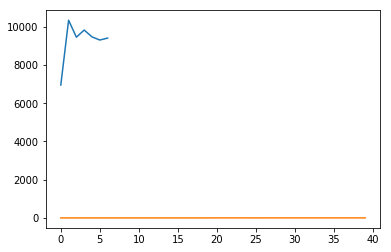

In [552]:
plt.plot(Ttest)
plt.plot(classes)

print("Accuracy: ", 100 - np.mean(np.abs(Ttest - Y)) * 100, "%")

In [435]:
Ytest

array([[0.42945634],
       [0.40137889],
       [0.35131983],
       [0.24187826],
       [0.06876681],
       [0.01606473],
       [0.52061774],
       [1.17766036],
       [0.74108364],
       [0.27862707],
       [0.00909375],
       [0.35329364],
       [0.77979773],
       [0.95025094],
       [0.96424234],
       [0.96183297],
       [0.95914286],
       [0.95791611],
       [0.95730913],
       [0.95706725]])

ValueError: x and y must have same first dimension, but have shapes (2, 1) and (20, 1)

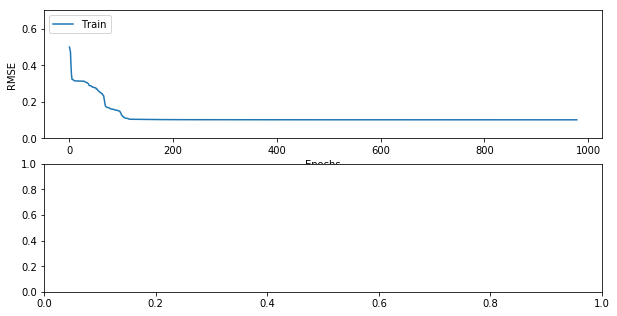

In [498]:
plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(nn.ftrace)
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

plt.subplot(3,1,2)
plt.plot(X,T,'o-',Xtest,Ttest,'o-',Xtest,Ytest,'o-')
plt.xlim(-10,10)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')
'''
plt.subplot(3,1,3)
plt.plot(X, Z[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');
'''

# Conclusions

In this assignment we learn about CV, Neural Net, nonlinear Logistic regression. In my opinion bases on the toy data and black friday data, nonlinear regression performs better. And CV is helping to find out the most desired model.

# Extra Credit

Now you are testing various **activation functions** in this section. Use the best neural network structure and explore 3 different activation functions of your choice (one should be *tanh* that you used in the previous sections). 
You should use cross validation to discover the best model (with activation function). 


One extra credit is assigned when you finish the work completely. 


# How to start?

* Download [a3.tgz](http://webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/a3.tgz). 
* Unzip the python files to current working directory.
* Import the necessary classes or functions including NeuralNet.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
40 | Methods | 
 | 10| Summary of CV & correctness of implementation
 | 5| Summary of nonlinear regression 
 | 5| Explanation of codes
 | 5| Summary of nonlinear logistic regression 
 | 5| Explanation of codes
 |10| Examination of correct implementation (NonlinearLogReg) with toy data.
40 | Results | Your Data
| 10| Presentaion of CV results
| 10| Discussions about parameter/network structure choice 
| 10| plots for results
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 
